In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [2]:
# Parameter
xname = r"$M_{\nu}$"
xname_hat = r"$\hat{M}_\nu$"
xname_true = r"$M_{\nu, \mathrm{true}}$"
x_true = 0.06
x_lim = 0.6

# 2024_06_02_Wilks_varying_h_m_ncdm_0.06
x_hat1 = np.array([8.802337e-02, 3.254431e-03, 1.278590e-01, 1.807312e-01, 3.700712e-01, 9.639836e-03, 3.777788e-01, 6.886662e-02, 1.463452e-01 , 1.619534e-01 , 4.782623e-04 , 9.807907e-02 , 1.593476e-02 , 1.843469e-01 , 1.262491e-04 , 3.150805e-03 , 3.056070e-02 , 1.039122e-01 , 2.798206e-01 , 3.524371e-02 , 1.121765e-03 , 1.487181e-01 , 3.773085e-03 , 2.306543e-01 , 1.968254e-01 , 2.817968e-01 , 1.021068e-02 , 1.523485e-01 , 3.512758e-04 , 2.918567e-01 , 2.690681e-01 , 5.376845e-04 , 1.181883e-03 , 2.689295e-01 , 1.677119e-03 , 1.422845e-01 , 1.177631e-01 , 1.060369e-01 , 3.132745e-03 , 1.115067e-03 , 1.355009e-01 , 5.595677e-02 , 3.766053e-01 , 3.500755e-01 , 2.603681e-03 , 5.483471e-03 , 6.120793e-02 , 5.081009e-02 , 1.752276e-01 , 5.082161e-03 , 2.504159e-02 , 1.719106e-03 , 1.003003e-01 , 7.002765e-04 , 1.393177e-01 , 1.367442e-01 , 3.069025e-03 , 2.738184e-02 , 9.713664e-04 , 1.141047e-01 , 5.167843e-02 , 5.323619e-02 , 9.418255e-02 , 2.150751e-01 , 2.546620e-04 , 2.979381e-03 , 5.684564e-03 , 4.011510e-03 , 7.222071e-04 , 1.632589e-02 , 1.634957e-01 , 1.214195e-01 , 6.446053e-02 , 1.747574e-01 , 1.998427e-04 , 2.259138e-01 , 8.580823e-02 , 4.847222e-03 , 2.231740e-01 , 4.658481e-04 , 2.087749e-03 , 1.458666e-01 , 4.235394e-01 , 1.043288e-03 , 2.963137e-01 , 9.422579e-03 , 1.244831e-03 , 9.720038e-02 , 2.113065e-02 , 1.913806e-01 , 4.276554e-03 , 1.989964e-03 , 3.647303e-03 , 1.686629e-02 , 2.415202e-01 , 5.266724e-05 , 1.415069e-01 , 1.910496e-01 , 1.050875e-03 , 9.837508e-02, 1.433041e-01 , 7.223775e-02 , 1.023867e-01 , 1.669410e-01 , 6.832217e-02 , 4.038919e-02 , 2.796616e-03 , 9.979585e-04 , 2.644698e-01 , 2.199375e-01 , 2.070585e-03 , 1.232626e-03 , 2.139638e-01 , 9.206381e-05 , 1.282423e-01 , 7.094756e-04 , 8.798994e-04 , 2.324856e-01 , 2.821197e-01 , 1.632430e-01 , 3.540886e-04 , 1.281675e-03 , 4.029100e-04 , 5.707067e-02 , 3.999705e-02 , 2.259064e-01 , 7.744119e-02 , 2.140445e-01 , 1.992289e-04 , 1.090408e-03 , 1.911368e-01 , 2.356506e-01 , 1.267647e-01 , 3.483513e-01 , 5.130679e-02 , 6.366253e-02 , 3.737383e-01 , 2.297532e-01 , 1.107356e-01 , 1.359147e-01 , 8.570327e-04 , 2.115770e-01 , 1.482952e-03 , 2.061254e-01 , 2.924229e-01 , 4.205815e-04 , 4.062897e-04 , 9.332362e-02 , 3.339990e-02 , 7.298088e-02 , 5.470860e-03 , 4.842425e-02 , 3.876574e-02 , 7.437828e-02 , 1.059032e-01 , 6.820562e-04 , 7.565913e-04 , 1.358030e-03 , 3.030771e-01 , 6.342097e-02 , 1.223164e-03 , 1.440635e-01 , 5.270006e-02 , 7.571886e-02 , 3.203630e-02 , 1.663103e-01 , 3.643694e-03 , 5.369370e-01 , 1.908239e-01 , 5.505609e-02 , 2.887851e-01 , 2.400311e-01 , 1.955402e-01 , 3.768324e-02 , 9.334495e-04 , 9.987588e-02 , 3.766143e-01 , 2.863879e-01 , 1.613698e-04 , 1.848521e-01 , 6.866627e-02 , 2.848054e-03 , 1.761670e-01 , 3.965419e-02 , 5.647302e-04 , 1.427007e-01 , 1.699747e-01 , 7.001548e-02 , 4.278415e-01 , 5.055319e-02 , 1.585608e-01 , 1.124793e-03 , 2.886260e-04 , 9.124832e-04 , 4.320056e-03 , 4.024905e-01 , 1.676036e-01 , 1.743006e-01 , 1.112237e-01 , 9.512501e-03])
lnL_hat1 = -np.array([   339.26,       302.75,       284.09,       348.03,       305.97,       298.06,       290.70,       303.36, 301.52, 333.63, 302.94, 331.24, 308.50, 334.81, 310.57, 327.00, 293.47, 282.75, 314.21, 300.46, 318.26, 300.77, 275.30, 323.67, 330.38, 337.78, 306.64, 300.58, 290.30, 301.19, 305.93, 304.95, 301.84, 280.69, 304.55, 300.43, 292.96, 285.13, 310.48, 317.27, 305.56, 321.64, 292.83, 298.29, 304.56, 306.90, 330.51, 310.81, 300.19, 308.96, 304.10, 331.47, 282.38, 284.40, 298.13, 304.40, 287.74, 298.10, 312.11, 313.98, 316.36, 307.38, 329.17, 301.80, 288.97, 309.39, 293.86, 287.55, 307.07, 286.66, 311.66, 295.71, 316.32, 312.59, 307.78, 314.68, 298.24, 289.79, 319.18, 270.54, 305.89, 269.07, 303.94, 293.27, 332.80, 323.23, 309.41, 282.71, 324.36, 299.35, 333.97, 321.02, 300.22, 295.40, 308.47, 297.49, 270.05, 300.26, 317.65, 292.41, 300.55, 296.59, 314.74, 317.22, 306.30, 298.80, 320.36, 336.83, 287.00, 292.27, 287.13, 294.58, 286.13, 306.86, 290.90, 295.72, 313.33, 308.48, 332.23, 290.46, 315.00, 275.24, 332.25, 298.21, 340.63, 297.74, 284.56, 299.48, 302.16, 329.85, 310.56, 293.89, 309.26, 262.01, 316.98, 296.96, 288.10, 285.87, 311.22, 309.38, 304.00, 296.12, 303.85, 282.09, 310.23, 285.68, 291.08, 300.71, 310.79, 355.98, 308.27, 304.51, 291.95, 259.62, 297.17, 301.13, 276.55, 296.99, 270.49, 304.28, 314.81, 308.23, 313.28, 344.61, 296.75, 283.59, 290.57, 308.56, 333.85, 276.43, 316.77, 312.79, 284.65, 272.23, 302.29, 321.09, 318.36, 319.47, 275.45, 329.39, 259.24, 305.42, 317.30, 299.91, 317.96, 290.44, 275.71, 300.77, 289.63, 332.63, 310.51, 324.19, 339.14, 297.22, 319.03, 322.81, 342.61, 297.88, 280.09, 279.99])
lnL_tru1 = -np.array([   339.31,       302.81,       284.16,       348.47,       306.99,       298.15,       291.85,       303.37, 301.64, 333.81, 303.44, 331.27, 308.52, 335.13, 311.00, 327.36, 293.50, 282.84, 315.27, 300.48, 318.64, 301.04, 275.44, 324.32, 330.67, 338.50, 306.69, 300.80, 290.91, 301.94, 306.77, 305.17, 302.05, 281.85, 304.83, 300.51, 293.00, 285.16, 310.51, 317.55, 305.61, 321.64, 294.94, 300.18, 304.86, 307.17, 330.52, 310.82, 300.39, 309.23, 304.14, 331.73, 282.43, 284.78, 298.49, 304.52, 287.92, 298.13, 312.21, 314.05, 316.38, 307.39, 329.21, 302.22, 289.35, 309.57, 293.96, 287.82, 307.26, 286.71, 312.11, 295.88, 316.31, 312.86, 308.25, 315.23, 298.25, 290.01, 319.39, 270.61, 306.12, 269.23, 306.92, 293.95, 333.65, 323.31, 309.93, 282.77, 324.42, 299.51, 334.10, 321.34, 300.34, 295.50, 308.91, 297.89, 270.34, 300.47, 317.99, 293.57, 300.89, 296.60, 314.80, 317.53, 306.30, 298.82, 320.56, 337.09, 288.32, 292.40, 287.31, 294.79, 286.52, 307.09, 291.10, 296.26, 313.95, 309.14, 333.23, 290.87, 315.32, 275.28, 332.71, 298.22, 340.65, 298.53, 284.56, 300.03, 302.32, 329.94, 311.01, 294.39, 309.39, 262.82, 317.00, 296.97, 289.84, 286.38, 311.26, 309.55, 304.39, 296.52, 304.03, 282.41, 310.52, 285.82, 291.56, 300.75, 310.79, 356.00, 308.36, 304.52, 291.97, 260.42, 297.31, 301.17, 276.89, 297.35, 271.04, 304.28, 314.92, 308.41, 313.28, 344.61, 296.76, 283.99, 290.75, 310.71, 334.43, 276.43, 317.67, 312.99, 285.09, 272.24, 302.59, 321.13, 319.27, 320.37, 275.67, 329.60, 259.24, 305.81, 317.44, 299.92, 318.50, 290.64, 275.95, 300.78, 291.34, 332.63, 311.06, 324.66, 339.51, 297.41, 319.25, 323.83, 342.64, 298.41, 280.17, 280.06])

# 2024_06_05_Wilks_varying_h_m_ncdm_0.06
x_hat2 = np.array([ 8.779939e-02, 4.808470e-04, 1.064023e-01, 1.651957e-01, 3.660664e-01, 5.035886e-03, 4.150743e-01, 6.857912e-02, 1.490057e-01 , 1.653667e-01 , 1.338986e-05 , 9.887690e-02 , 2.109641e-02 , 1.902406e-01 , 1.227931e-03 , 3.292117e-03 , 3.080626e-02 , 9.887493e-02 , 2.767579e-01 , 2.906388e-02 , 5.798651e-04 , 1.475212e-01 , 3.440663e-03 , 2.300150e-01 , 2.006645e-01 , 2.891277e-01 , 1.448135e-02 , 1.675692e-01 , 8.784445e-04 , 2.956176e-01 , 2.864540e-01 , 3.074434e-04 , 3.633353e-03 , 2.777106e-01 , 1.028264e-03 , 1.465829e-01 , 1.026223e-01 , 9.299735e-02 , 3.906539e-03 , 4.960628e-04 , 1.368671e-01 , 5.592214e-02 , 3.725594e-01 , 3.522950e-01 , 1.110555e-03 , 6.108550e-04 , 5.112947e-02 , 5.567779e-02 , 1.622759e-01 , 3.202123e-03 , 2.505391e-02 , 1.846309e-03 , 1.091915e-01 , 2.107497e-04 , 1.509368e-01 , 1.319144e-01 , 1.725986e-03 , 2.277209e-02 , 6.372022e-03 , 1.041944e-01 , 5.052763e-02 , 5.360671e-02 , 9.818073e-02 , 2.180669e-01 , 6.935887e-04 , 2.230011e-03 , 5.760558e-03 , 1.406861e-03 , 1.011323e-04 , 5.989819e-03 , 1.574934e-01 , 1.276465e-01 , 5.899463e-02 , 1.778893e-01 , 1.381162e-04 , 2.235229e-01 , 8.471184e-02 , 5.538847e-03 , 2.119247e-01 , 2.577007e-03 , 2.761675e-03 , 1.415632e-01 , 4.296774e-01 , 4.086278e-04 , 3.255133e-01 , 1.790586e-02 , 8.125389e-04 , 9.647051e-02 , 1.709785e-02 , 1.921157e-01 , 9.333793e-04 , 2.206981e-03 , 2.995666e-03 , 2.181356e-02 , 2.763932e-01 , 1.528918e-03 , 1.415943e-01 , 2.107232e-01 , 1.040541e-03 , 1.225911e-01,          1.478334e-01 , 7.095583e-02 , 1.134344e-01 , 1.563230e-01 , 7.055211e-02 , 5.169283e-02 , 1.334883e-03 , 4.270106e-03 , 2.600562e-01 , 2.239789e-01 , 2.454315e-03 , 1.248823e-03 , 1.963624e-01 , 3.690640e-04 , 1.282143e-01 , 5.224615e-04 , 1.998277e-03 , 2.419167e-01 , 2.839287e-01 , 1.492719e-01 , 1.081852e-03 , 2.713383e-03 , 2.994663e-04 , 5.562732e-02 , 3.975001e-02 , 2.256510e-01 , 7.781955e-02 , 2.239097e-01 , 1.281452e-03 , 2.805757e-03 , 2.031167e-01 , 2.359278e-01 , 1.219679e-01 , 3.672938e-01 , 5.101622e-02 , 6.249036e-02 , 3.688409e-01 , 2.248917e-01 , 1.110255e-01 , 1.367545e-01 , 6.941980e-05 , 2.507836e-01 , 2.588534e-03 , 2.105580e-01 , 2.940175e-01 , 1.508578e-03 , 2.015982e-03 , 9.029853e-02 , 3.463964e-02 , 7.308753e-02 , 3.477438e-03 , 2.315355e-02 , 3.858862e-02 , 8.610699e-02 , 1.042019e-01 , 4.682177e-04 , 8.222732e-04 , 4.283493e-04 , 3.027909e-01 , 6.387507e-02 , 8.438367e-04 , 1.455777e-01 , 4.857983e-02 , 7.504303e-02 , 2.661371e-02 , 1.751414e-01 , 2.072073e-03 , 5.411163e-01 , 1.859620e-01 , 5.031711e-02 , 2.886788e-01 , 2.398630e-01 , 2.010608e-01 , 4.326581e-02 , 1.431477e-03 , 9.966703e-02 , 3.747232e-01 , 2.854181e-01 , 1.922620e-04 , 1.858414e-01 , 6.375811e-02 , 3.185270e-03 , 1.767441e-01 , 3.822067e-02 , 5.259354e-04 , 1.419864e-01 , 1.807685e-01 , 6.836925e-02 , 4.280941e-01 , 5.286591e-02 , 1.583213e-01 , 1.793949e-03 , 1.192877e-03 , 5.716000e-03 , 4.085182e-03 , 4.023741e-01 , 1.754941e-01 , 1.797650e-01 , 1.159117e-01 , 3.623215e-03])
lnL_hat2 = -np.array([    339.26,       302.75,       284.09,       348.03,       305.89,       298.06,       290.64,       303.36, 301.52, 333.63, 302.94, 331.23, 308.50, 334.80, 310.56, 327.00, 293.47, 282.75, 314.21, 300.46, 318.26, 300.76, 275.30, 323.67, 330.37, 337.78, 306.64, 300.58, 290.30, 301.19, 305.92, 304.95, 301.84, 280.68, 304.54, 300.43, 292.96, 285.12, 310.47, 317.26, 305.56, 321.64, 292.83, 298.13, 304.56, 306.90, 330.51, 310.81, 300.18, 308.95, 304.10, 331.47, 282.38, 284.40, 298.13, 304.40, 287.74, 298.10, 312.10, 313.98, 316.36, 307.38, 329.17, 301.80, 288.97, 309.39, 293.86, 287.55, 307.07, 286.66, 311.66, 295.71, 316.31, 312.59, 307.78, 314.68, 298.24, 289.78, 319.18, 270.54, 305.89, 269.07, 303.94, 293.27, 332.79, 323.23, 309.42, 282.70, 324.36, 299.35, 333.97, 321.02, 300.22, 295.39, 308.45, 297.49, 270.05, 300.16, 317.65, 292.98,           300.54, 296.59, 314.74, 317.22, 306.29, 298.79, 320.37, 336.76, 287.00, 292.28, 287.13, 294.58, 286.13, 306.86, 290.90, 295.72, 313.33, 308.48, 332.23, 290.46, 315.00, 275.24, 332.25, 298.20, 340.63, 297.75, 284.55, 299.48, 302.15, 329.85, 310.56, 293.89, 309.26, 262.01, 316.98, 296.96, 287.68, 285.88, 311.21, 309.38, 304.00, 296.11, 303.85, 282.09, 310.22, 285.68, 291.08, 300.71, 310.78, 355.98, 308.26, 304.51, 291.95, 260.40, 297.17, 301.13, 276.56, 296.99, 270.48, 304.27, 314.81, 308.23, 313.28, 344.60, 296.75, 283.59, 290.58, 308.56, 333.84, 276.42, 316.77, 312.78, 284.65, 272.23, 302.29, 321.09, 318.36, 319.47, 275.12, 329.39, 259.24, 305.42, 317.30, 299.90, 317.96, 290.44, 275.70, 300.77, 289.62, 332.63, 310.51, 324.19, 339.14, 297.22, 319.03, 322.81, 342.60, 297.87, 280.08, 279.99])
lnL_tru2 = -np.array([    339.30,       302.81,       284.16,       348.46,       306.99,       298.15,       291.85,       303.37, 301.64, 333.81, 303.44, 331.27, 308.52, 335.12, 311.00, 327.35, 293.50, 282.83, 315.27, 300.48, 318.64, 301.04, 275.44, 324.32, 330.67, 338.50, 306.68, 300.80, 290.91, 301.94, 306.77, 305.17, 302.05, 281.85, 304.82, 300.50, 293.00, 285.16, 310.50, 317.54, 305.61, 321.64, 294.94, 300.18, 304.86, 307.17, 330.52, 310.82, 300.39, 309.23, 304.14, 331.72, 282.42, 284.78, 298.49, 304.52, 287.93, 298.13, 312.20, 314.05, 316.38, 307.39, 329.21, 302.22, 289.35, 309.56, 293.96, 287.81, 307.26, 286.71, 312.11, 295.88, 316.31, 312.86, 308.25, 315.23, 298.25, 290.01, 319.39, 270.61, 306.12, 269.23, 306.91, 293.95, 333.65, 323.31, 309.93, 282.76, 324.41, 299.51, 334.10, 321.34, 300.33, 295.49, 308.90, 297.89, 270.34, 300.47, 317.99, 293.57,           300.89, 296.60, 314.80, 317.53, 306.30, 298.81, 320.55, 337.09, 288.32, 292.40, 287.31, 294.79, 286.52, 307.09, 291.09, 296.26, 313.95, 309.14, 333.23, 290.87, 315.32, 275.28, 332.71, 298.21, 340.65, 298.53, 284.56, 300.03, 302.32, 329.94, 311.00, 294.38, 309.39, 262.82, 317.00, 296.96, 289.84, 286.39, 311.26, 309.54, 304.39, 296.52, 304.03, 282.41, 310.52, 285.82, 291.56, 300.75, 310.79, 356.00, 308.35, 304.52, 291.96, 260.42, 297.31, 301.17, 276.89, 297.35, 271.03, 304.28, 314.92, 308.41, 313.28, 344.62, 296.76, 283.99, 290.75, 310.71, 334.43, 276.43, 317.67, 312.99, 285.09, 272.24, 302.58, 321.12, 319.27, 320.37, 275.67, 329.60, 259.24, 305.81, 317.44, 299.91, 318.50, 290.63, 275.95, 300.78, 291.34, 332.64, 311.06, 324.66, 339.51, 297.42, 319.25, 323.83, 342.64, 298.41, 280.18, 280.06])

# Asimov data set        
xs_asimov   =   np.array([0.00, 0.02, 0.04, 0.06, 0.08, 0.10, 0.20, 0.30, 0.40, 0.50])
chi2_asimov = 2*np.array([0.04, 0.02, 0.01, 0.00, 0.01, 0.02, 0.33, 1.02, 2.17, 3.80])

# Combine
lnL_hat = np.maximum(lnL_hat1, lnL_hat2)
lnL_tru = np.maximum(lnL_tru1, lnL_tru2)
x_hat = np.where(lnL_hat1>lnL_hat2, x_hat1, x_hat2)

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
print("max LR: ", np.max(LR))

max LR:  5.940000000000055


In [3]:
# histogram settings
bin_width = 0.32
bin_max = 6
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

# x settings
x_bin_width = 0.02
x_bins = np.arange(0, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(0, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [4]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [5]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  0.07215133628739616
1 sigma:  0.1553643306373252


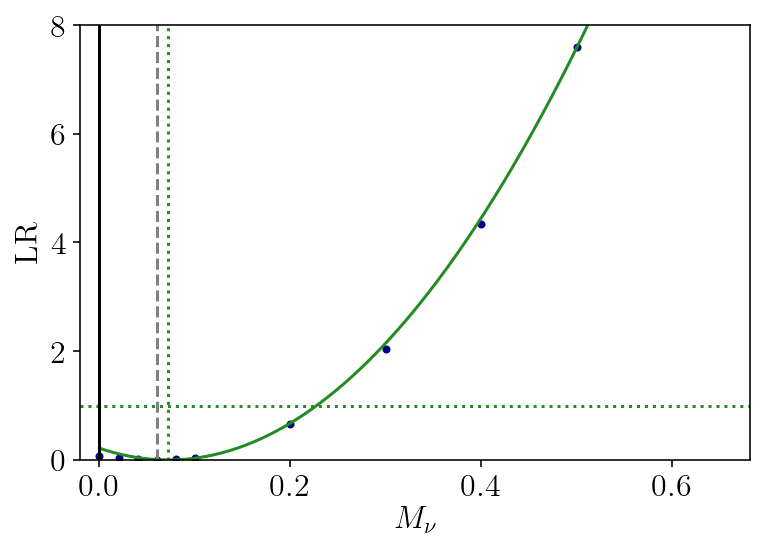

In [6]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, xs_asimov, chi2_asimov, p0=[0.0018, 9.675, 0.059], maxfev=30000)
fit_x = x_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[-0.5,0.5])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma
x_lim = 4*sigma_asimov

# Plot
plt.plot(xs_asimov, chi2_asimov, marker=".", ls="", color="navy")
plt.plot(fit_x, fit_y, color='forestgreen', ls='-')
plt.axvline(x_true, color="grey", ls="--")
plt.axvline(c, color="forestgreen", ls=":")
plt.axhline(1, color="forestgreen", ls=":")
plt.axvline(0, color="black", ls="-")
plt.ylabel("LR")
plt.xlabel(xname)
plt.ylim([0,8])
plt.xlim([-0.02, x_true+x_lim])
plt.show()

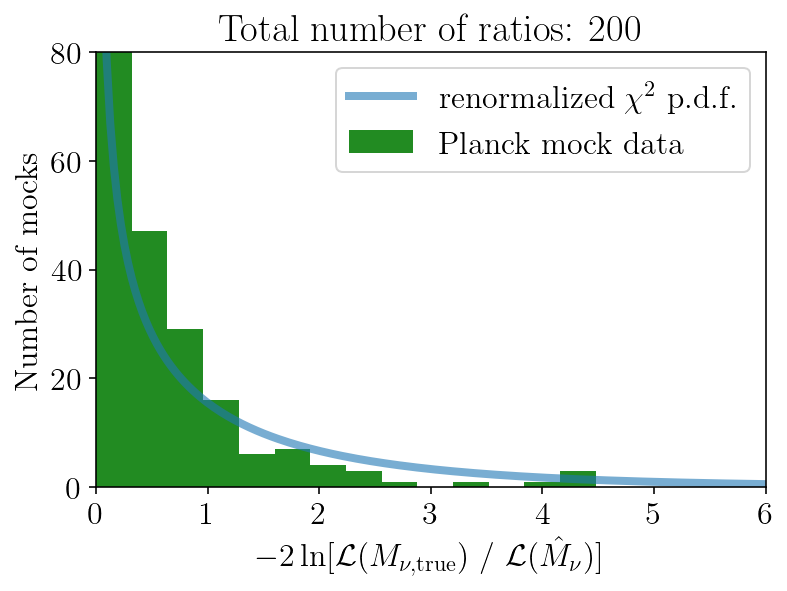

In [7]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="forestgreen", label="Planck mock data")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="tab:blue", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,80])
plt.xlabel(r"$-2\ln[\mathcal{L}$("+xname_true+r") / $\mathcal{L}$("+xname_hat+r")]")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

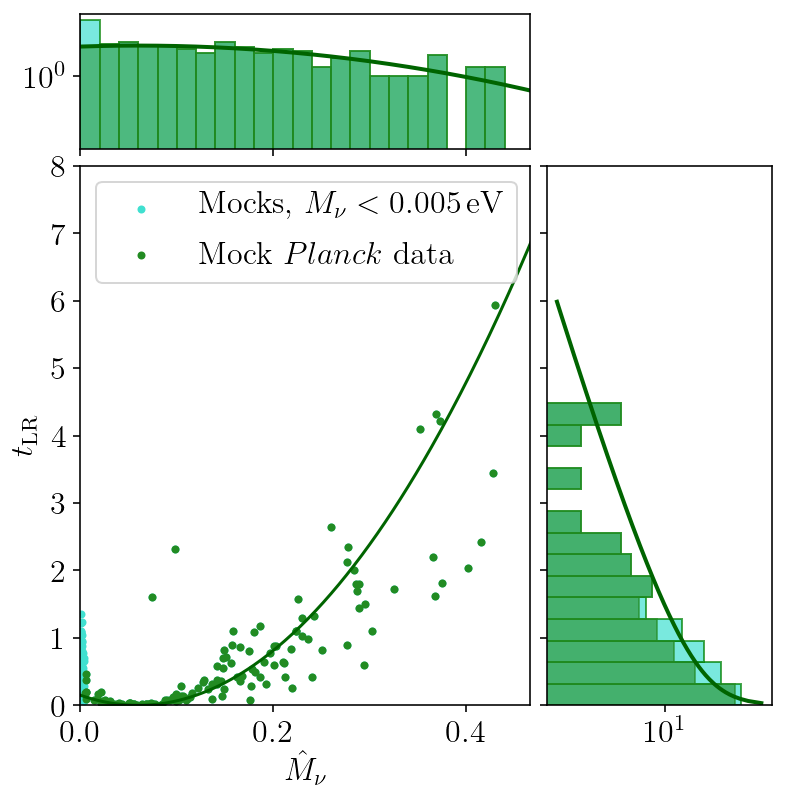

In [8]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(x_hat, LR, color="turquoise", marker=".", label=r"Mocks, $M_\nu<0.005\,$eV")
ax.scatter(x_hat[(np.nonzero(0.005<x_hat))], LR[(np.nonzero(0.005<x_hat))], color="forestgreen", marker=".", label=r"Mock ${Planck}$ data")
ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/sigma_asimov**2, color='darkgreen', ls='-')
ax.set_xlim([0.0, 3*sigma_asimov])
ax.set_ylim([0,8])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend(loc="upper left")

# Hist x
ax_histx.hist(x_hat, bins=x_bins, color="turquoise", alpha=0.7, edgecolor='green')
ax_histx.hist(x_hat[(np.nonzero(0.005<x_hat))], bins=x_bins, color="forestgreen", alpha=0.5, edgecolor='forestgreen')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=sigma_asimov), color='darkgreen', lw=2)
ax_histy.set_xscale("log")

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="turquoise", alpha=0.7, edgecolor='green')
ax_histy.hist(LR[(np.nonzero(0.005<x_hat))], bins=bins, orientation='horizontal', color="forestgreen", alpha=0.6, edgecolor='forestgreen')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='darkgreen', lw=2)
ax_histx.set_yscale("log")

plt.savefig("LR_hist_varying_h_Mnu.pdf", format="PDF", bbox_inches='tight')
plt.show()

In [9]:
# Find \Delta\chi^2 for which 68% of mocks are below
LR_cutoff = 0.74
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

68.0 % of mocks below:  0.74


In [10]:
# Find \Delta\chi^2 for which 95.45% of mocks are below
LR_cutoff = 2.32
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

95.5 % of mocks below:  2.32


In [11]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(x_hat))

sigma_asimov:  0.1553643306373252
sigma_mocks:  0.11509218298525933
